In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import randompartitions
from collections import Counter
import numpy
from numpy import var, log, exp, arange, sqrt, pi
from scipy.stats import chi2

In [2]:
partition = randompartitions.randomPartition_AD5(100)
print(partition)

[31, 17, 12, 10, 10, 4, 4, 4, 2, 2, 1, 1, 1, 1]


##### The plot function is very badly behaved (creates its own figure with voodoo scalings, etc) and not to be relied on
### The French notation is assumed by default

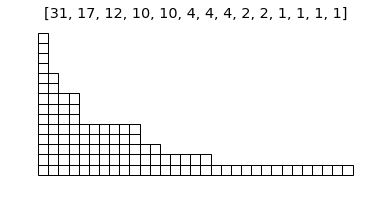

In [3]:
randompartitions.plot_YoungDiagram(partition)
plt.title(partition)

In [4]:
partition2 = randompartitions.randomPartition_AD5(100)
print(partition2)

[19, 19, 16, 10, 10, 6, 4, 4, 3, 3, 3, 2, 1]


### The english notation places the largest part on top.

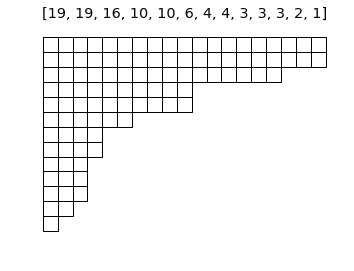

In [5]:
randompartitions.plot_YoungDiagram(partition2, notation='english')
plt.title(partition2)

### You can also put a constrain on the number of parts

In [6]:
partition_10parts = randompartitions.randomPartition_AD5(100, 10)
print(partition_10parts)

[36, 13, 13, 9, 7, 7, 6, 6, 2, 1]


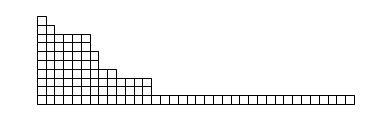

In [7]:
randompartitions.plot_YoungDiagram(partition_10parts)

### Is it uniform?

In [8]:
nb_draws = 1000
occurences = Counter([tuple(randompartitions.randomPartition_AD5(15, 7)) for _ in range(nb_draws)])
occurences

Counter({(3, 2, 2, 2, 2, 2, 2): 52,
         (3, 3, 2, 2, 2, 2, 1): 46,
         (3, 3, 3, 2, 2, 1, 1): 56,
         (3, 3, 3, 3, 1, 1, 1): 52,
         (4, 2, 2, 2, 2, 2, 1): 46,
         (4, 3, 2, 2, 2, 1, 1): 42,
         (4, 3, 3, 2, 1, 1, 1): 52,
         (4, 4, 2, 2, 1, 1, 1): 47,
         (4, 4, 3, 1, 1, 1, 1): 51,
         (5, 2, 2, 2, 2, 1, 1): 47,
         (5, 3, 2, 2, 1, 1, 1): 42,
         (5, 3, 3, 1, 1, 1, 1): 50,
         (5, 4, 2, 1, 1, 1, 1): 42,
         (5, 5, 1, 1, 1, 1, 1): 53,
         (6, 2, 2, 2, 1, 1, 1): 44,
         (6, 3, 2, 1, 1, 1, 1): 59,
         (6, 4, 1, 1, 1, 1, 1): 41,
         (7, 2, 2, 1, 1, 1, 1): 43,
         (7, 3, 1, 1, 1, 1, 1): 48,
         (8, 2, 1, 1, 1, 1, 1): 46,
         (9, 1, 1, 1, 1, 1, 1): 41})

In [9]:
variance_discreteRV = ((len(occurences) + 1.0)**2 - 1.0)/12
variance_sample = var([i for i, s in enumerate(occurences.values()) for _ in range(s)])
variance_discreteRV, variance_sample

(40.25, 35.590635999999996)

In [10]:
f = 1.0/len(occurences)
G_statistic = 2*sum([o*(log(o) - log(nb_draws) - log(f)) for o in occurences.values()])

In [11]:
G_statistic, chi2.sf(G_statistic, nb_draws - 1)

(10.969155421417675, 1.0)

### p-value for the G test (LRT/information divergence goodness of fit) is 1.0
### It's uniform with probability virtually 1

### Asymptotic behavior

For partitions of $n\gg 1$, the relation between parts $\lambda_k$ part sizes $k$([*Boris Pittel. On a likely shape of the random Ferrers diagram. Adv. in Appl. Math., 18(4):432–488, 1997*](http://dx.doi.org/10.1006/aama.1996.0523)) follows

$$\exp\left(-\frac{c\lambda_k}{\sqrt{n}}\right) + \exp\left(-\frac{c k}{\sqrt{n}}\right) = 1$$
where $c = \pi/\sqrt{6}$. Isolating $k$ or $\lambda_k$ we find the curve
$$\lambda_k = -\frac{\sqrt{6n}}{\pi}\log\left(1 - \exp\left(-\frac{\pi k}{\sqrt{6n}}\right)\right)$$

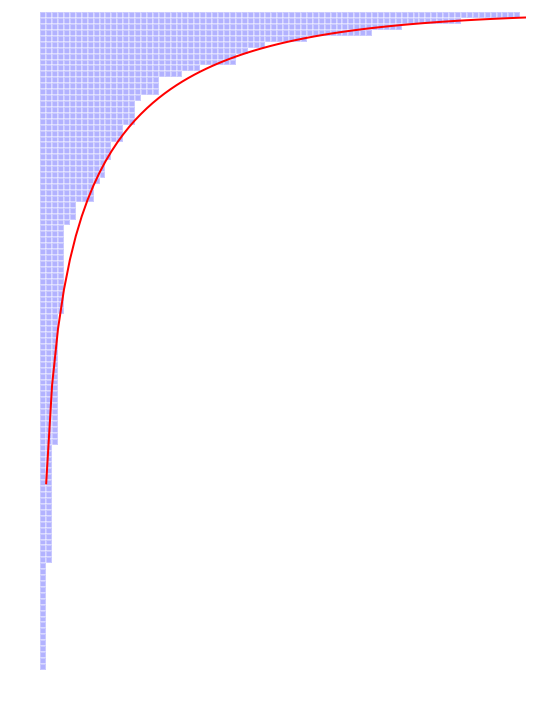

In [13]:
n = 1000
large_partition = randompartitions.randomPartition_AD5(n)

plt.figure(figsize=(12, 12))
partition = randompartitions.randomPartition_AD5(1000)
randompartitions.plot_YoungDiagram(partition, notation='english', patch_kwargs={'facecolor':'blue', 'alpha':0.3, 'edgecolor':'white', 'linewidth':2})
randompartitions.plot_asymptotic_shape(partition, notation='english')